Month case : green AND Week case : red
British Columbia weekly covid case are : 1044
British Columbia monthly covid case are : 4156


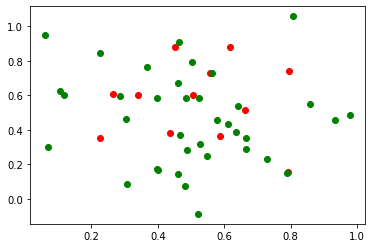

In [1]:
# source: Vancouver Sun https://vancouversun.com/news/local-news/covid-19-update-for-july-21-heres-what-you-need-to-know
from http.client import HTTPConnection
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import random

extractText = "COVID-19 update for July 21:  and 21 deaths over seven days. People gave 1900 comments and 2900 ideas. news reporter says BC has 1044 new cases for this week" # track by 
# ----  1,044 new cases AND  1900 comments ------ 

BCMonthlyBCcase = 4156
BcWeeklyCase = 0 # to be compute

extractText = extractText.replace(",","")
totalcase = 0

# extract numbers that contains 4 digits
def findweekcase(extractText):  
  weekcase = 0 
  countdigit = 0
  all4digits = []
  #count = 3
  for i in range(len(extractText)): # 0-5 if range(6)
    if(extractText[i].isdigit()):
      countdigit += 1
      if ( 4 == countdigit):
        all4digits.append(extractText[i-3] +extractText[i-2] +extractText[i-1]+extractText[i])
    else: 
      countdigit = 0
  return all4digits

all4digits = findweekcase(extractText) # save array containing all 4 digits


# find covid cases based on neigbour behind phrase 
def numberRefercase(givenSentence,array4digits):  
  storeIndex = 0 
  extractneighbour = ""
  numbercovidcase = 0
  box = []
  for i in range(len(array4digits)):
    storeIndex = givenSentence.index(array4digits[i]) # get index position of each number (that is 4 digits)
    extractneighbour = givenSentence[storeIndex:storeIndex+20]# extract phrase up to 10 characters that is position behind each number 
    if "cases" in extractneighbour: 
      numbercovidcase = array4digits[i]
    box.append(extractneighbour)

  return numbercovidcase

 
BcWeeklyCase = int(numberRefercase(extractText,all4digits))
print("Month case : green AND Week case : red")
print("British Columbia weekly covid case are : " + str(BcWeeklyCase))
print("British Columbia monthly covid case are : " + str(BCMonthlyBCcase))

# rescale Weekly & month cases into percentage  
weekbyPercentage = (BcWeeklyCase/BCMonthlyBCcase)
monthbyPercentage = 1 - weekbyPercentage

# determine amount of scatter plot by percentange
totalpoints = 50
firstscat = int(totalpoints*weekbyPercentage)
secondscat = int(totalpoints*monthbyPercentage)

# visualize data 
x = [random.triangular() for i in range(firstscat)]
y = [random.gauss(0.5, 0.25) for i in range(firstscat)]

x2 = [random.triangular() for i in range(secondscat)]
y2 = [random.gauss(0.5, 0.25) for i in range(secondscat)]

plt.scatter(x,y, color = 'red')
plt.scatter(x2,y2,color = 'green')
plt.show()
#findweekcase(extractText)
 
# total case extract from net 
# --- SUB --- 
# 
# text extract 
# text to visualizer 